## 读入1准备好的语料，前提从网络上爬取资料


In [14]:
%pip install wordcloud
from wordcloud import WordCloud
import pandas as pd
%pip install matplotlib
from matplotlib import pyplot as plt
import jieba
%pip install nltk
import nltk
from  nltk  import FreqDist

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
#读入文件
raw=pd.read_csv('金庸-射雕英雄传txt精校版.txt',names=['txt'],sep='aaa',encoding="GBK")
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   txt     7165 non-null   object
dtypes: object(1)
memory usage: 56.1+ KB


<ipython-input-9-a1cf26eb7e0e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw=pd.read_csv('金庸-射雕英雄传txt精校版.txt',names=['txt'],sep='aaa',encoding="GBK")


In [10]:
raw.head(50)

,txt
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...
1,更多资源下载：http://qqzone.ctdisk.com
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※"
3,------------------------------------------
4,“金庸作品集”新序
5,小说是写给人看的。小说的内容是人。
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反映出...
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与才能...
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏重于...
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小说，...


###2.加入章节标识

In [11]:
#章节判断用变量进行预处理
def m_head(tmpstr):
    return tmpstr[:1] #提取每一行字符串的第一个字符
def m_mid(tmpstr):
    return tmpstr.find("回")
raw['head']=raw.txt.apply(m_head)
raw['mid']=raw.txt.apply(m_mid)
raw['len']=raw.txt.apply(len)
raw


,txt,head,mid,len
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,全,-1,55
1,更多资源下载：http://qqzone.ctdisk.com,更,-1,31
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※",※,-1,49
3,------------------------------------------,-,-1,42
4,“金庸作品集”新序,“,-1,9
...,...,...,...,...
7160,二〇〇二年六月,二,-1,7
7161,------------------------------------------,-,-1,42
7162,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,全,-1,55
7163,更多资源下载：http://qqzone.ctdisk.com,更,-1,31


In [12]:
#进行章节的判断
chapnum=0
for i in range(len(raw)):
    if raw['head'][i]=='第' and raw['mid'][i]>0 and raw['len'][i]<30:
        chapnum+=1
    if chapnum>=40 and raw['txt'][i]=="附录一：成吉思汗":
        chapnum=0
    raw.loc[i,'chap']=chapnum
raw.head(50)

,txt,head,mid,len,chap
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,全,-1,55,0.0
1,更多资源下载：http://qqzone.ctdisk.com,更,-1,31,0.0
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※",※,-1,49,0.0
3,------------------------------------------,-,-1,42,0.0
4,“金庸作品集”新序,“,-1,9,0.0
5,小说是写给人看的。小说的内容是人。,小,-1,17,0.0
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反映出...,小,-1,225,0.0
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与才能...,西,-1,56,0.0
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏重于...,基,-1,151,0.0
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小说，...,小,-1,133,0.0


In [13]:
#删除临时行
del raw['head']
del raw['mid']

del raw['len']
raw.head(50)

,txt,chap
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,0.0
1,更多资源下载：http://qqzone.ctdisk.com,0.0
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※",0.0
3,------------------------------------------,0.0
4,“金庸作品集”新序,0.0
5,小说是写给人看的。小说的内容是人。,0.0
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反映出...,0.0
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与才能...,0.0
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏重于...,0.0
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小说，...,0.0


### 提取所需要的章节

In [16]:
raw[raw.chap==2].head()

,txt,chap
258,第二回 江南七怪,2.0
259,颜烈跨出房门，过道中一个中年士人拖着鞋皮，踢跶踢跶的直响，一路打着哈欠迎面过来，那士人似笑非...,2.0
260,颜烈见这人衣着明明是个斯文士子，却如此肮脏，不禁皱了眉头，加快脚步，只怕沾到了那人身上污秽，...,2.0
261,那人又是几声干笑，踢跶踢跶地向前去了，只听他走到过道尽头，对店小二道：“喂，伙计啊，你别瞧大...,2.0
262,颜烈更加心头火起，心想好小子，这话不是冲着我来吗？那店小二听那人一说，斜眼向他看了眼，不禁起...,2.0


<AxesSubplot:>

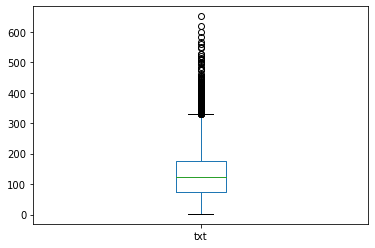

In [17]:
%matplotlib inline
raw.txt.agg(len).plot.box()#根据文章章节的长度形成盒子图

In [19]:
#根据章chap进行汇总
raw_grp=raw.groupby('chap')
chapter =raw_grp.agg(sum)#相同的章节的行进行字符串连接
chapter

,txt
chap,
0.0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...
1.0,第一回 风雪惊变钱塘江浩浩江水，日日夜夜无穷无休的从两浙西路临安府牛家村边绕过，东流入海。江...
2.0,第二回 江南七怪颜烈跨出房门，过道中一个中年士人拖着鞋皮，踢跶踢跶的直响，一路打着哈欠迎面过...
3.0,第三回 黄沙莽莽寺里僧众见焦木圆寂，尽皆悲哭。有的便为伤者包扎伤处，抬入客舍。忽听得巨钟下的...
4.0,第四回 黑风双煞完颜洪熙笑道：“好，再打他个痛快。”蒙古兵前哨报来：“王罕亲自前来迎接大金国...
5.0,第五回 弯弓射雕一行人下得山来，走不多时，忽听前面猛兽大吼声一阵阵传来。韩宝驹一提缰，胯下黄...
6.0,第六回 崖顶疑阵午饭以后，郭靖来到师父帐中。全金发道：“靖儿，我试试你的开山掌练得怎样了。”...
7.0,第七回 比武招亲江南六怪与郭靖晓行夜宿，向东南进发，在路非止一日，过了大漠草原。这天离张家口...
8.0,第八回 各显神通王处一脚步好快，不多时便带同郭靖到了城外，再行数里，到了一个山峰背后。他不住...


In [26]:
#导入停用词库，并转为列表
stoplist=list(pd.read_csv('./停用词.txt',names=['w'],sep="aaa",encoding='utf-8',engine='python').w)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.638 seconds.
Prefix dict has been built successfully.


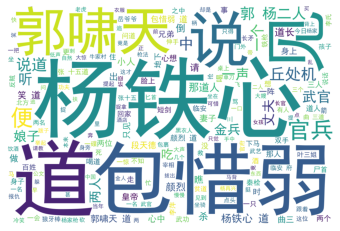

In [31]:
import wordcloud
import jieba
myfont=r"C:\Windows\Fonts\simhei.ttf"
cloudobj=wordcloud.WordCloud(font_path=myfont,
                             width=1200,
                             height=800,
                             mode='RGBA',
                             background_color=None,
                             stopwords=stoplist).generate(' '.join(jieba.lcut(chapter.txt[1])))
plt.imshow(cloudobj)
plt.axis("off")
plt.show()

##  方法二使用nltk FreqDist进行次频统计生成一个词条频数字典

In [32]:
import nltk
from nltk import FreqDist

In [33]:
#定义一个分词函数。去停用词
def m_cut(intext):
    return [w for w in jieba.cut(intext) if w not in stoplist]

In [37]:
tokens=m_cut(chapter.txt[2])
#生产完整的词条频数
fdist=FreqDist(tokens)
type(fdist)

nltk.probability.FreqDist

In [38]:
fdist

FreqDist({'道': 177, '丘处机': 154, '…': 86, '缸': 65, '段天德': 55, '中': 54, '完颜洪烈': 51, '铜': 48, '说': 45, '柯镇恶': 42, ...})

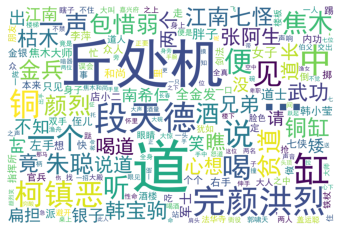

In [39]:
import wordcloud
import jieba
myfont=r"C:\Windows\Fonts\simhei.ttf"
cloudobj=wordcloud.WordCloud(font_path=myfont,
                             width=1200,
                             height=800,
                             mode='RGBA',
                             background_color=None,
                             stopwords=stoplist).fit_words(fdist)
plt.imshow(cloudobj)
plt.axis("off")
plt.show()